# 手寫辨識
利用類神經網路(Feed-Forward Neural Network)實作分類問題

### 資料引入

In [1]:
import preload_mnist
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
X_train,y_train,X_test,y_test = preload_mnist.run()

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
已解析 10000张
魔数:2049, 图片数量: 10000张
已解析 10000张


In [3]:
print 'shape of train-images:',X_train.shape
print 'shape of train-labels:',y_train.shape
print 'shape of test-images:',X_test.shape
print 'shape of train-labels:',y_test.shape

shape of train-images: (60000L, 28L, 28L)
shape of train-labels: (60000L,)
shape of test-images: (10000L, 28L, 28L)
shape of train-labels: (10000L,)


* 前十筆訓練標籤

In [4]:
y_train[:10]

array([ 5.,  0.,  4.,  1.,  9.,  2.,  1.,  3.,  1.,  4.])

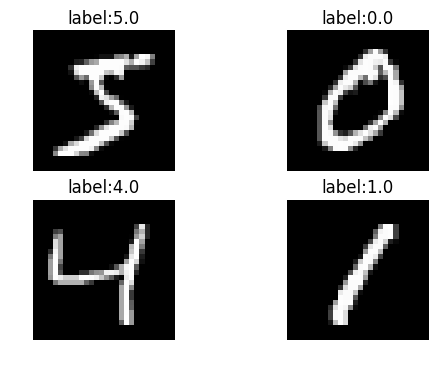

In [5]:
plot_nums = 4

for index in range(plot_nums):    
    plt.subplot(2,2,index+1)
    plt.imshow(X_train[index],cmap='gray',interpolation='nearest')
    plt.title('label:{}'.format(y_train[index]))
    plt.axis('off')

### 建立模型

* 引入套件

In [6]:
import keras 
np.random.seed(1337) 
from keras.models import Sequential
from keras.layers.core import Dropout,Dense,Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using Theano backend.


* 將`28*28`的2維陣列(像素)拉成1維陣列

In [7]:
X_train = X_train.reshape(X_train.shape[0],28*28)
y_train = np_utils.to_categorical(y_train,nb_classes=10)
X_test = X_test.reshape(X_test.shape[0],28*28)
y_test = np_utils.to_categorical(y_test,nb_classes=10)

C:\Anaconda2\lib\site-packages\keras\utils\np_utils.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


* 正規化

In [8]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
X_train /= 255
X_test /= 255

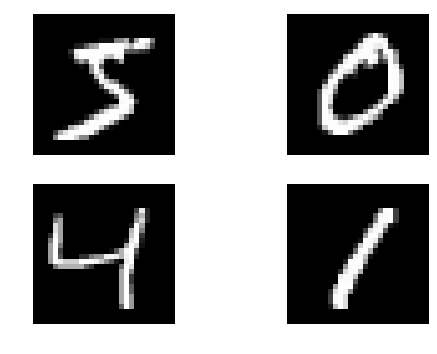

In [9]:
plot_nums = 4

for index in range(plot_nums):    
    plt.subplot(2,2,index+1)
    plt.imshow(X_train[index].reshape(28,28),cmap='gray',interpolation='nearest')
#     plt.title('label:{}'.format(y_train[index]))
    plt.axis('off')

In [10]:
def mlp_model():
    model = Sequential()
    model.add(Dense(output_dim=512,input_dim=28*28,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(output_dim=512,activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(10,activation='softmax'))    
    model.summary()
    return model

In [63]:
model = mlp_model()
model.compile(
    loss="categorical_crossentropy",
    optimizer = 'adam',
    metrics=['accuracy']
)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 512)           401920      dense_input_3[0][0]              
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 512)           262656      dense_4[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 10)            5130        dense_5[0][0]                    
Total params: 669706
____________________________________________________________________________________________________


In [64]:
history = model.fit(X_train,y_train,nb_epoch=10,batch_size=20,verbose=1,
         validation_data = (X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 55s - loss: 0.1855 - acc: 0.9428 - val_loss: 0.1007 - val_acc: 0.9681
Epoch 2/10
60000/60000 [==============================] - 60s - loss: 0.0836 - acc: 0.9743 - val_loss: 0.0927 - val_acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 63s - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0755 - val_acc: 0.9774
Epoch 4/10
60000/60000 [==============================] - 66s - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0838 - val_acc: 0.9769
Epoch 5/10
60000/60000 [==============================] - 67s - loss: 0.0388 - acc: 0.9877 - val_loss: 0.0737 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 68s - loss: 0.0352 - acc: 0.9889 - val_loss: 0.1102 - val_acc: 0.9751
Epoch 7/10
60000/60000 [==============================] - 70s - loss: 0.0290 - acc: 0.9915 - val_loss: 0.1016 - val_acc: 0.9789
Epoch 8/10
60000/60000 [==============================

### 驗證與測試

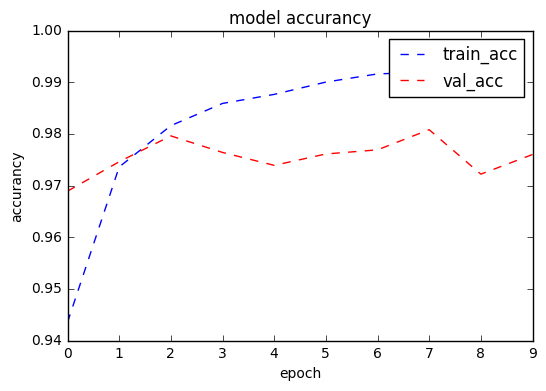

In [57]:
train_acc_hist = history.history['acc']
val_acc_hist = history.history['val_acc']

plt.plot(train_acc_hist,'--',label='train_acc')
plt.plot(val_acc_hist,'--',color='r',label = 'val_acc')
plt.ylabel('accurancy')
plt.xlabel('epoch')
plt.title('model accurancy')
plt.legend()
# print 'validation history:{}'.format(history.history['val_acc'])

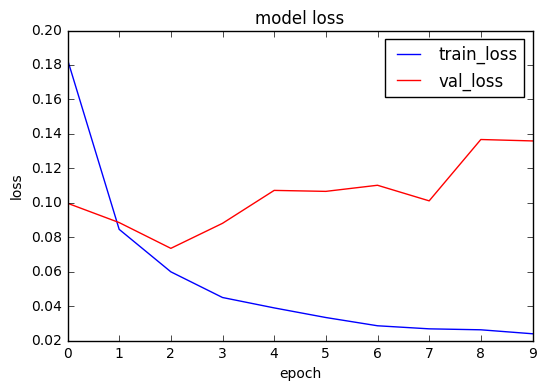

In [56]:
train_loss_hist = history.history['loss']
val_loss_hist = history.history['val_loss']

plt.plot(train_loss_hist,'-',label='train_loss')
plt.plot(val_loss_hist,'-',color='r',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend()

In [73]:
score = model.evaluate(X_test,y_test,verbose=0)

In [74]:
print 'test score: %.2f'%score[0]
print 'test accuracy: %.2f' %score[1]

test score: 0.14
test accuracy: 0.98


### 模型儲存/取出

In [84]:
filepath = './model/mlp-mnist2.h5'
model.save(filepath)

In [13]:
from keras.models import load_model

In [15]:
temp_model = load_model('./model/mlp-mnist.h5')

In [18]:
ypred = temp_model.predict(X_test)


* 隨機4筆測試資料的預測值

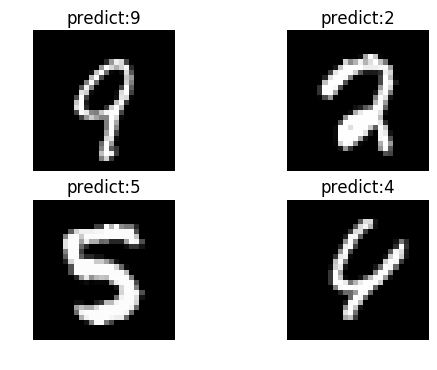

In [65]:
plot_nums = 4 # 畫4張圖
rand = np.random.randint(200) #隨機取正整數
for index in range(plot_nums):    
    plt.subplot(2,2,index+1)
    plt.imshow(X_test[index+rand].reshape(28,28),cmap='gray',interpolation='nearest')
    
    y_pred = ypred[index+rand].argsort()[-1] #預測值
    plt.title('predict:{}'.format(y_pred)) 
    plt.axis('off')